In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def reader(n):
    df = pd.read_csv("expenses.csv")

    try:
        refill_index = df[df["Date"] == "Refill" ].index[-n]
        df = df.loc[refill_index + 1 :]
    except:
        pass
    df["Amount"] = df["Amount"].astype(int)
    df["Split"] = df["Split"].astype(int)
    df["Not Me"] = df["Not Me"].astype(int)
    return df

df = reader(1)
df

,Date,Amount,Item,Category,Split,Not Me
351,2024-09-01,250,recharge,utility,1,0
352,2024-09-01,216,breakfast,utility,1,0
353,2024-09-01,100,medicine,utility,1,0
354,2024-09-01,150,vegetables,utility,1,0
355,2024-09-01,150,haircut,utility,1,0
356,2024-09-01,50,cabbage,utility,1,0
357,2024-09-02,50,milk,utility,1,0
358,2024-09-02,200,petrol,travel,1,0
359,2024-09-02,20,chocolate,food,2,0
360,2024-09-02,30,stationery,utility,1,0


## total spend

In [2]:
def total_spent(df):
    d = df.drop(df[df["Not Me"] == 1].index)
    d["Amount"] = d["Amount"] / d["Split"]
    return d["Amount"].sum()

a = total_spent(df)
a

3042.0

# top spends

In [3]:
df[["Date", "Amount", "Item", "Category"]].sort_values(by="Amount", ascending=False)

,Date,Amount,Item,Category
372,2024-09-07,505,honey-rave,utility
351,2024-09-01,250,recharge,utility
369,2024-09-05,240,anna-kuteera-dinner,utility
363,2024-09-03,240,medicine,utility
352,2024-09-01,216,breakfast,utility
358,2024-09-02,200,petrol,travel
370,2024-09-06,200,petrol,travel
361,2024-09-03,200,puliogare,utility
355,2024-09-01,150,haircut,utility
354,2024-09-01,150,vegetables,utility


## categorical

In [4]:
def categorical(df):
    d = df[["Category", "Amount", "Split", "Not Me"]]
    d = d.drop(d[d["Not Me"] == 1].index)
    d["Amount"] = d["Amount"] / d["Split"]
    d.drop(["Split", "Not Me"], axis=1, inplace=True)
    d = d.groupby("Category").sum()
    return d

d = categorical(df)
d

,Amount
Category,
food,200.0
travel,300.0
utility,2542.0


## plot

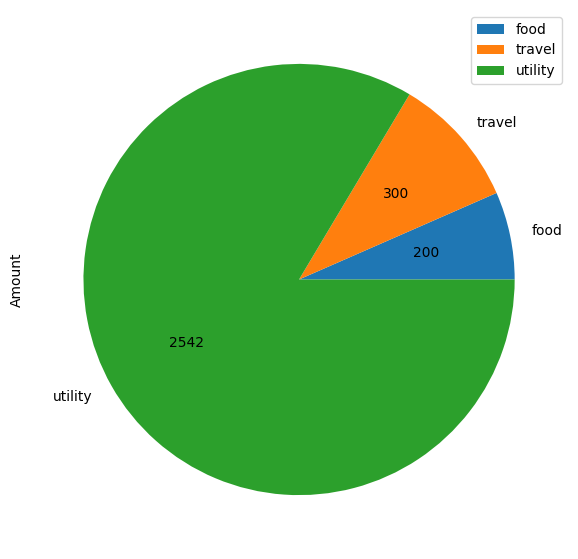

In [5]:
def absolute_value(val):
    return int(round(val / 100.0 * d["Amount"].sum()))

plt.figure(figsize=(7, 7))
d["Amount"].plot(kind="pie", autopct=absolute_value, legend=True)
plt.show()

## date wise

In [6]:
d = df[["Date", "Amount"]].groupby("Date").sum()
d

,Amount
Date,
2024-09-01,916
2024-09-02,300
2024-09-03,518
2024-09-04,178
2024-09-05,425
2024-09-06,380
2024-09-07,505


## plot


<Axes: xlabel='Date'>

<Figure size 900x900 with 0 Axes>

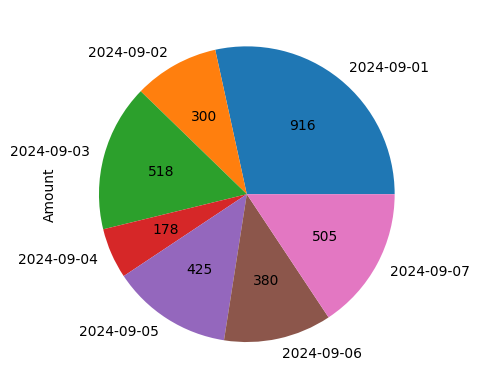

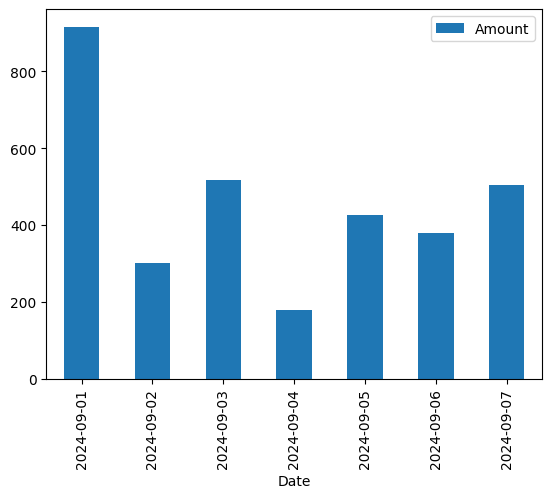

In [7]:
plt.figure(figsize=(9, 9))
d.plot(kind="pie", y="Amount", autopct=absolute_value, legend=False)
d.plot(kind="bar")


## owed

In [8]:
d = df[["Amount", "Split", "Not Me"]]
s = d[d["Not Me"] == 1]
d = d.drop(s.index)
sum1 = s["Amount"].sum()
sum2 = (d["Amount"] - (d["Amount"] / d["Split"])).sum()
print(sum1 + sum2)

180.0


## No of refills ago

In [9]:
def no_of_refills_ago(n):
    df = pd.read_csv("expenses.csv")
    refill_index = df[df["Date"] == "Refill"].index[-(n)]
    try:
        refill_index2 = df[df["Date"] == "Refill"].index[-(n + 1)]
    except:
        refill_index2 = 0
    df = df.loc[refill_index2 + 1: refill_index - 1]
    df["Amount"] = df["Amount"].astype(int)
    df["Split"] = df["Split"].astype(float)
    df["Not Me"] = df["Not Me"].astype(int)
    return categorical(df)

e = no_of_refills_ago(1)
e

,Amount
Category,
food,734.166667
travel,500.000000
utility,3698.000000


## common items

In [10]:
import pandas as pd
def most_common_item():
    df = pd.read_csv("expenses.csv")
    a = df["Item"].value_counts()
    print(a)
most_common_item()

Item
milk            29
petrol          28
vegetables      28
chocolate       23
honey-chilli    11
                ..
noodles          1
printout         1
book             1
cane-o-la        1
kulcha           1
Name: count, Length: 137, dtype: int64


# All time - starting sep 2022

In [11]:
import pandas as pd

df = pd.read_csv("expenses.csv")
df = df.drop(df[df["Date"] == "Refill"].index)
df["Amount"] = df["Amount"].astype(int)
df["Split"] = df["Split"].astype(float)
df["Not Me"] = df["Not Me"].astype(int)
y = df[df["Not Me"] == 0]
x = y["Amount"] / y["Split"]
86000 + x.sum()


128573.16666666666

# Month Wise

In [12]:
import pandas as pd

df = pd.read_csv("expenses.csv")
df = df.drop(df[df["Date"] == "Refill"].index)
df["Amount"] = df["Amount"].astype(int)
df["Split"] = df["Split"].astype(float)
df["Not Me"] = df["Not Me"].astype(int)
df = df.drop(df[df["Not Me"] == 1].index)
df["Amount"] = df["Amount"] / df["Split"]
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
s = df.groupby(df["Date"].dt.month)
s = s["Amount"].sum()
s

Date
4    6557.500000
5    9096.000000
6    6799.500000
7    7773.000000
8    9305.166667
9    3042.000000
Name: Amount, dtype: float64